In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
root_path = 'drive/My Drive/Colab Notebooks/'

data = pd.read_csv(root_path+'bigmart_data.csv')

data = data.dropna(how='any')

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [5]:
data2 = data[['Item_Type', 'Item_MRP']].groupby('Item_Type').mean()

data2

,Item_MRP
Item_Type,
Baking Goods,126.380766
Breads,140.952669
Breakfast,141.788151
Canned,139.763832
Dairy,148.499208
Frozen Foods,138.503366
Fruits and Vegetables,144.581235
Hard Drinks,137.077928
Health and Hygiene,130.818921


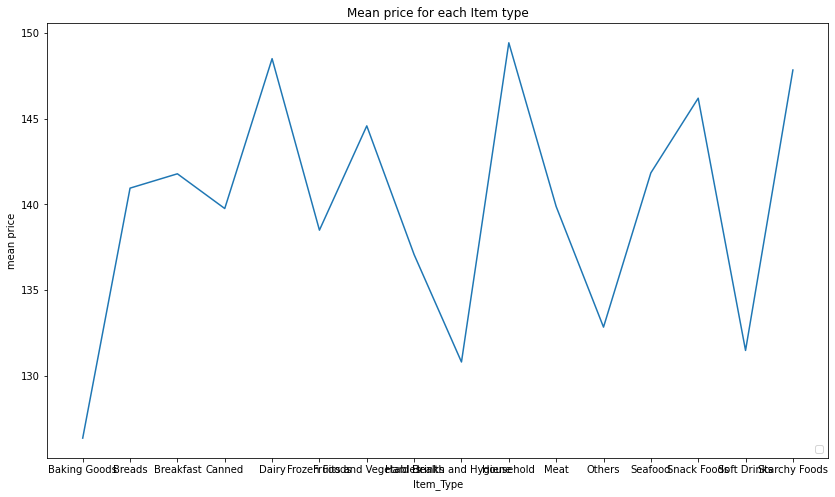

In [6]:
x = data2.index.tolist()
y = data2.values.tolist()

#fig size
plt.figure(figsize=(14, 8))

#set title
plt.title('Mean price for each Item type')

#set axis label
plt.xlabel('Item_Type')
plt.ylabel('mean price')

plt.legend(labels=[x, y], loc='lower right')

#set xticks
plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.plot(x, y)

In [8]:
data3 = data.groupby('Outlet_Size').Item_Outlet_Sales.mean()

data3.sort_values(inplace=True)

No handles with labels found to put in legend.


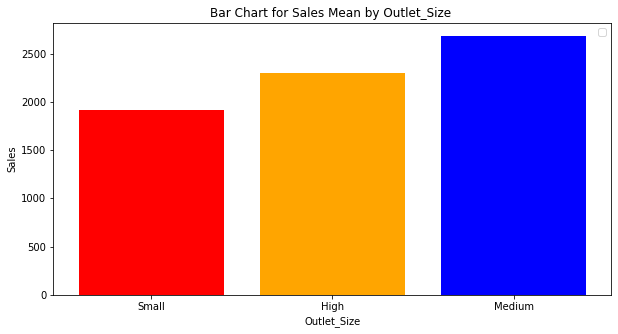

In [15]:
x=data3.index.tolist()
y=data3.values.tolist()

#figure size
plt.figure(figsize=(10, 5))

#Title
plt.title('Bar Chart for Sales Mean by Outlet_Size ')

#x and y label for the chart
plt.xlabel('Outlet_Size')
plt.ylabel('Sales')


#set tick for the graph
plt.xticks(labels=x, ticks=np.arange(len(x)))

#display bar chart with varying color
plt.bar(x, y, color=['red', 'orange', 'blue'])


plt.legend(loc='upper right')

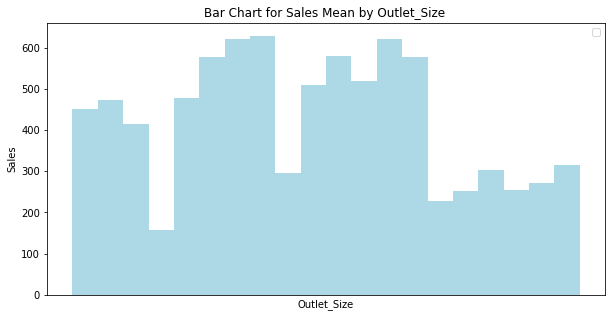

In [54]:
x=data3.index.tolist()
y=data3.values.tolist()

#figure size
plt.figure(figsize=(10, 5))

#Title
plt.title('Bar Chart for Sales Mean by Outlet_Size ')

#x and y label for the chart
plt.xlabel('Outlet_Size')
plt.ylabel('Frequency')

plt.legend(labels=['Outlet_Size', 'Sales'], loc='upper right')

#set tick for the graph
plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.hist(data['Item_MRP'], bins=20, color='lightblue');

In [18]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000
mean,12.898675,0.060700,141.716328,1999.190538,2272.037489
std,4.670973,0.044607,62.420534,7.388800,1497.964740
min,4.555000,0.000000,31.490000,1987.000000,69.243200
25%,8.770000,0.025968,94.409400,1997.000000,1125.202000
50%,12.650000,0.049655,142.979900,1999.000000,1939.808300
75%,17.000000,0.088736,186.614150,2004.000000,3111.616300
max,21.350000,0.188323,266.888400,2009.000000,10256.649000


In [30]:
q=data['Item_Outlet_Sales'].quantile(0.99)
data_new = data[data['Item_Outlet_Sales']<q]
data_new.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000
mean,12.902628,0.060771,140.813520,1999.211818,2220.232108
std,4.671340,0.044689,62.018519,7.390200,1412.434745
min,4.555000,0.000000,31.490000,1987.000000,69.243200
25%,8.770000,0.025967,94.094900,1997.000000,1115.547900
50%,12.650000,0.049676,142.015400,1999.000000,1922.830400
75%,17.000000,0.089038,185.391100,2004.000000,3078.659200
max,21.350000,0.188323,266.888400,2009.000000,6611.394000


{'boxes': [<matplotlib.lines.Line2D at 0x7ff51c570850>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff51c5738d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff51c4f9950>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff51c4f9410>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff51c570e10>,
  <matplotlib.lines.Line2D at 0x7ff51c503950>]}

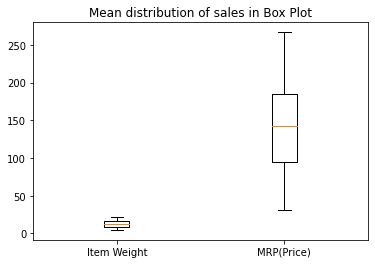

In [35]:
#State the data you are working with
data4 = data_new[['Item_Weight', 'Item_MRP']]

#declare the color of the outliers
red_diamond=dict(markerfacecolor='r', marker='D')

plt.title(label='Mean distribution of sales in Box Plot')

#plot boxplot chart
plt.boxplot(data4.values, labels=['Item Weight', 'MRP(Price)'], flierprops=red_diamond)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7ff51c570690>,
 'cbars': <matplotlib.collections.LineCollection at 0x7ff51c570350>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7ff51c5b3910>,
 'cmins': <matplotlib.collections.LineCollection at 0x7ff51c4e7410>}

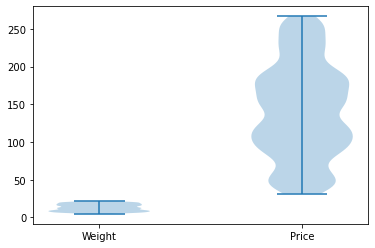

In [36]:
data5 = data[['Item_Weight', 'Item_MRP']]

fig, ax=plt.subplots()

plt.xticks(ticks=[1,2], labels=['Weight', 'Price'])

plt.violinplot(data5.values)

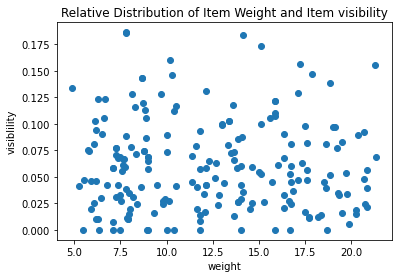

In [38]:
plt.xlabel('weight')
plt.ylabel('visiblility')

plt.title('Relative Distribution of Item Weight and Item visibility')

plt.scatter(data['Item_Weight'][:200], data['Item_Visibility'][:200])